# 다층신경망 실습

## 데이터 열기

In [1]:
!wget -c https://github.com/euphoris/datasets/raw/master/imdb.zip

--2021-05-04 16:35:04--  https://github.com/euphoris/datasets/raw/master/imdb.zip
Resolving github.com (github.com)... 52.78.231.108
Connecting to github.com (github.com)|52.78.231.108|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/euphoris/datasets/master/imdb.zip [following]
--2021-05-04 16:35:05--  https://raw.githubusercontent.com/euphoris/datasets/master/imdb.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
import pandas as pd
df = pd.read_csv('../data/imdb.zip')
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


## 전처리

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2000, stop_words='english')
m = cv.fit_transform(df.review)

In [4]:
m.shape

(1000, 2000)

## 모형 만들기

In [5]:
import tensorflow as tf

activation에 들어갈 수 있는 값: sigmoid, tanh, relu 등

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(2000,), activation='relu'))  # 은닉층
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 출력층

input_shape을 설정하면 모형 요약을 볼 수 있음

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256128    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 256,257
Trainable params: 256,257
Non-trainable params: 0
_________________________________________________________________


파라미터 갯수: 입력의 갯수X출력의 갯수 - > 200X128+출력마다절편(128)

# 학습률과 에포크 실습

## 학습 설정

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # sgd
    loss='binary_crossentropy', # 0아니면 1로 예측해야되기 때문
    metrics=['accuracy']
)

## 학습

In [9]:
result = model.fit(
    m.A, # 텍스트를 문서단어형태로 변환한 것을 압축해제해서 넣어줌
    df.sentiment.values, # 예측하고자 하는 것, tensorflow에서 받아줄 수 있는 형태 -> values
    epochs=30, 
    batch_size=32, # 배치사이즈가 작으면 불안정하나, 속도가 빠르다.
    validation_split=0.2, # 데이터중 20%는 학습에서 제외하고 평가로 사용
    verbose=0)

In [12]:
result.history

{'loss': [0.6882455348968506,
  0.6465988755226135,
  0.5808761715888977,
  0.4817308187484741,
  0.3697494566440582,
  0.27567410469055176,
  0.20836251974105835,
  0.16270993649959564,
  0.1318272203207016,
  0.10860408842563629,
  0.0919514074921608,
  0.08019457757472992,
  0.06976363807916641,
  0.06223394721746445,
  0.05598905682563782,
  0.05054246261715889,
  0.04635464772582054,
  0.04261044040322304,
  0.03942694514989853,
  0.036628156900405884,
  0.03400588408112526,
  0.03204643353819847,
  0.030321933329105377,
  0.028607001528143883,
  0.027378294616937637,
  0.025809628888964653,
  0.024528000503778458,
  0.023740898817777634,
  0.02280815877020359,
  0.0217294804751873],
 'accuracy': [0.5887500047683716,
  0.8912500143051147,
  0.9474999904632568,
  0.9512500166893005,
  0.9574999809265137,
  0.9612500071525574,
  0.9662500023841858,
  0.9712499976158142,
  0.9775000214576721,
  0.9787499904632568,
  0.9775000214576721,
  0.981249988079071,
  0.9850000143051147,
  0.9

## 에포크에 따른 변화

정확도

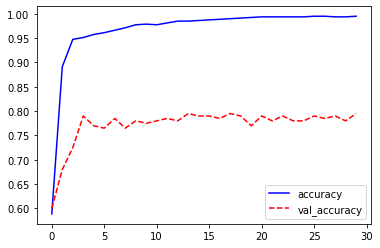

In [10]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend()

손실(교차 엔트로피)

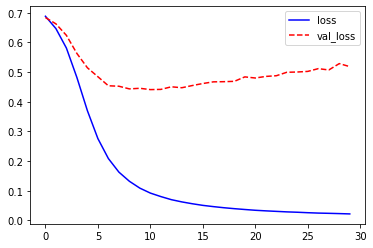

In [11]:
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r--', label='val_loss')
plt.legend()

# ModelCheckpoint

체크포인트 설정

In [13]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='model-{epoch:02d}', # 두자리 수로 출력 ex) 01,02,03...
    monitor='val_loss', # val_loss를 기준으로
    save_best_only=True) # 가장 마지막에 저장된 것이 베스트

학습

In [14]:
model.fit(
    m.A, 
    df.sentiment.values, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[checkpoint])

Epoch 1/30
25/25 [==============================] - 0s 10ms/step - loss: 0.0205 - accuracy: 0.9950 - val_loss: 0.5183 - val_accuracy: 0.7900
INFO:tensorflow:Assets written to: model-01\assets
Epoch 2/30
25/25 [==============================] - 0s 6ms/step - loss: 0.0199 - accuracy: 0.9950 - val_loss: 0.5312 - val_accuracy: 0.7950
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0194 - accuracy: 0.9950 - val_loss: 0.5377 - val_accuracy: 0.7950
Epoch 4/30
25/25 [==============================] - 0s 6ms/step - loss: 0.0183 - accuracy: 0.9962 - val_loss: 0.5384 - val_accuracy: 0.7950
Epoch 5/30
25/25 [==============================] - 0s 6ms/step - loss: 0.0179 - accuracy: 0.9962 - val_loss: 0.5387 - val_accuracy: 0.7950
Epoch 6/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 0.9962 - val_loss: 0.5594 - val_accuracy: 0.7800
Epoch 7/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 0.9962 - val_loss

가장 마지막으로 저장된 버전

In [15]:
import glob
name = sorted(glob.glob('model-*'))[-1] # 제일 마지막으로 저장된 것이 좋은 것

모형 불러오기

In [16]:
model = tf.keras.models.load_model(name)